In [1]:
import nbsetup
from models.sparc.result import Result
from models.sparc.mcmc import mcmc
from models.sparc.analysis import Analysis

In [2]:
from models.load import load_sparc
simulations = load_sparc(namespace='sparcapprox')

In [3]:
default = Result()

In [4]:
DATASET = 'Quality'

In [5]:
analysis = {
    'yes': Analysis('MCMC', mcmc(default.datasets()[DATASET], train_inc=True, train_tau=True)),
    #'no': Analysis('MCMC', mcmc(default.datasets()[DATASET], train_inc=False, train_tau=True))
}

In [15]:
results = dict([(mode, aa.Result(fast=True)) for mode, aa in analysis.items()])

In [16]:
# epsilon outside
for mode, res in results.items():
    print(mode)
    display(res.statistics(weight=True).query('dataset=="%s"' % DATASET))

yes


,dataset,observation,r2,RMSE,MAE,MLSE,Res(Log y),Res(Log mhi_R),Res(Log nulled)
4,Quality,little g,0.586609,23718.007713,5297.470081,0.381118,-0.061694,0.079386,-0.020949
5,Quality,velocity,0.805856,54.080950,34.949747,0.091275,-0.061694,0.079386,-0.020949


no


,dataset,observation,r2,RMSE,MAE,MLSE,Res(Log y),Res(Log mhi_R),Res(Log nulled)
4,Quality,little g,0.458142,16532.38057,2752.830647,0.241347,-0.062567,-0.007236,0.024036
5,Quality,velocity,0.894334,28.46901,19.906607,0.056990,-0.062567,-0.007236,0.024036


yes
no


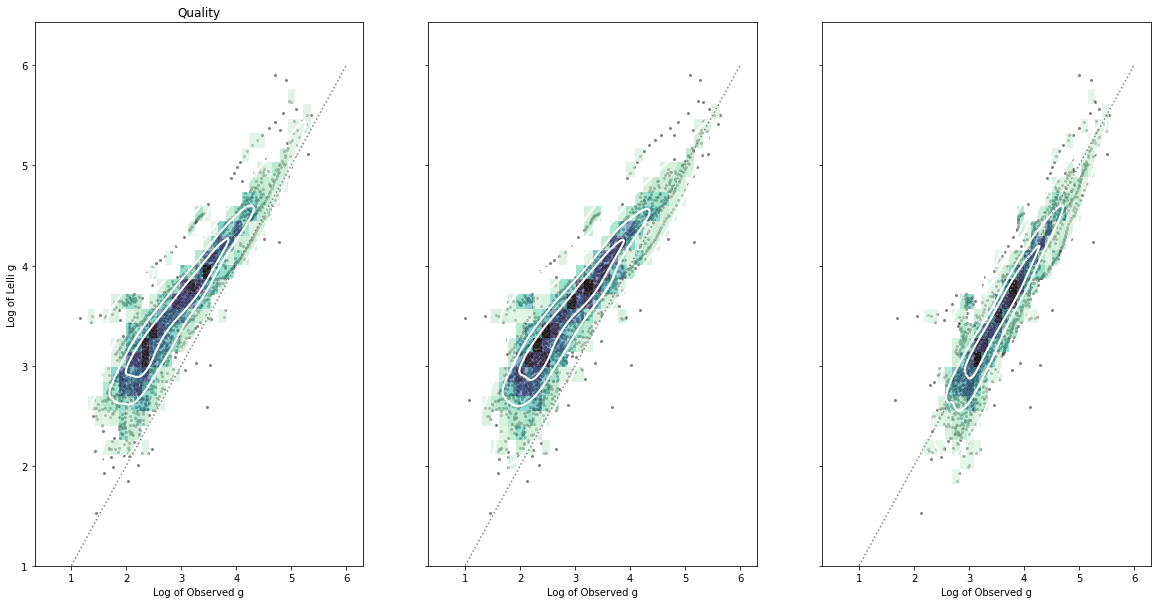

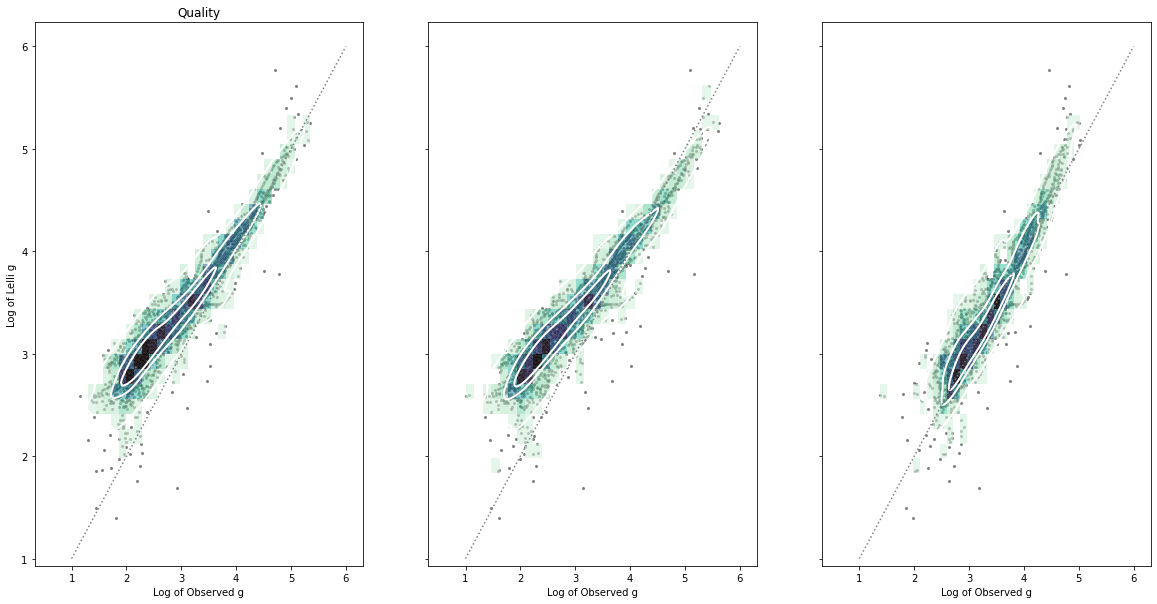

In [17]:
for mode, res in results.items():
    print(mode)
    res.plot_rar(kind=1, query_key=DATASET)

In [7]:
aa.Result(fast=True)

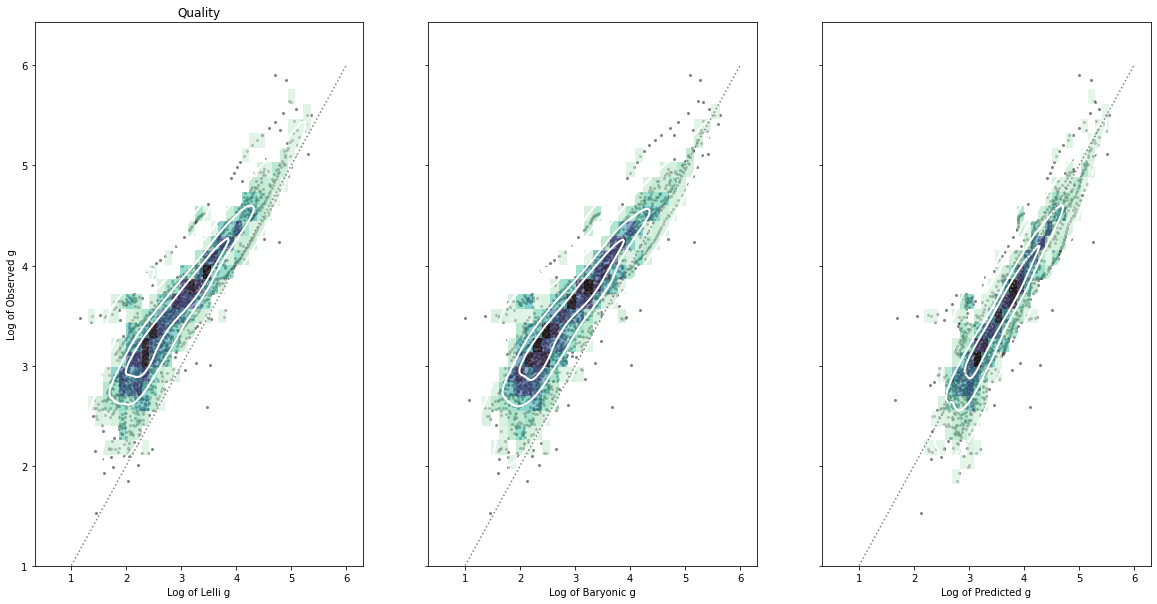

In [9]:
# {'gamma': array(46.90412017), 'alpha': array(0.38686575)}
aa = analysis['yes']
aa.uni = {'gamma': 36.90412017, 'alpha': 0.58686575}
aa.Result(fast=True, result=aa.result).plot_rar(kind=1, query_key=DATASET)

yes
no


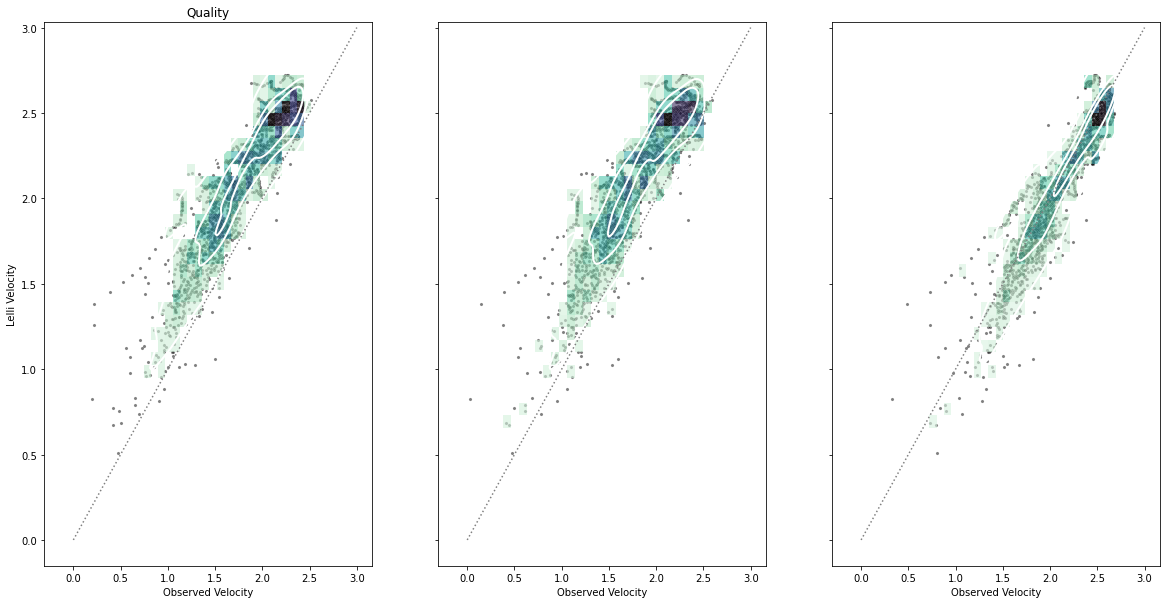

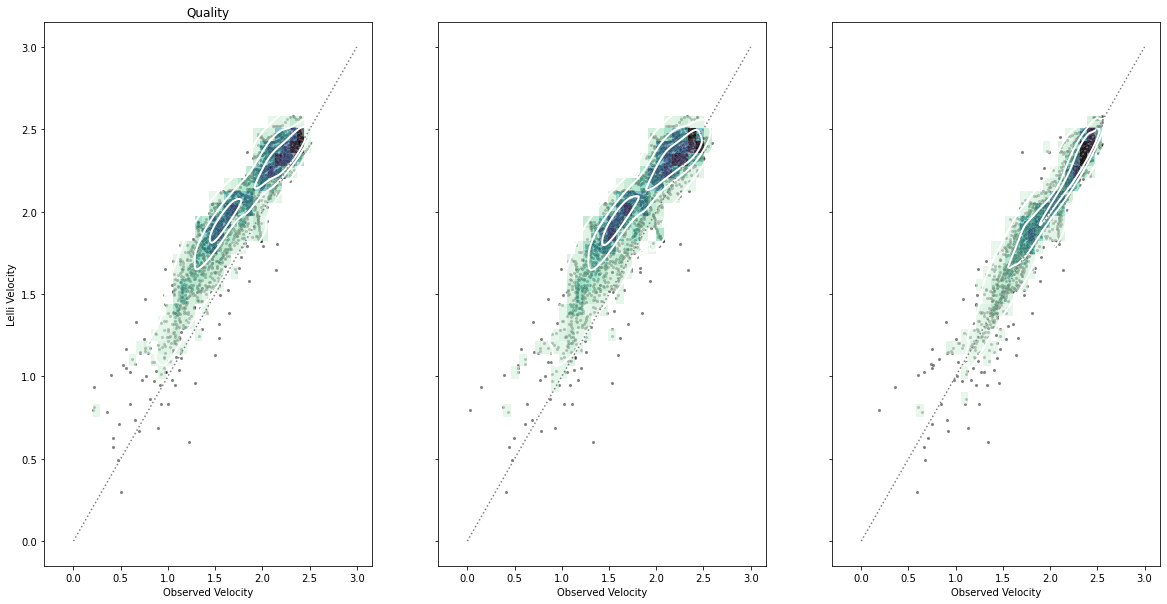

In [18]:
for mode, res in results.items():
    print(mode)
    res.plot_rar(kind=1, query_key=DATASET, velocity=True, line=[0,3])

yes


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, Inc, alpha, gamma]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 44 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


no


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, alpha, gamma]


Sampling 4 chains for 1_000 tune and 500 draw iterations (4_000 + 2_000 draws total) took 33 seconds.


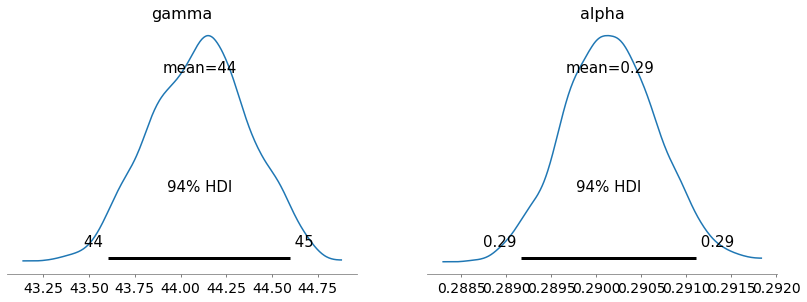

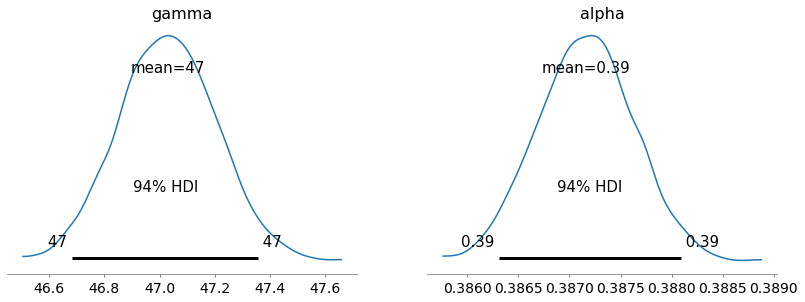

In [19]:
for mode, aa in analysis.items():
    print(mode)
    aa.plot_posterior()

In [2]:
from references.sparc import adjustment_df
adjs = adjustment_df()

In [61]:
adjs = adjs[adjs['Galaxy'].isin(mcmc_adjs['Galaxy'])]
adjs = pd.concat([adjs,mcmc_adjs], ignore_index=True)

In [11]:
def plot_comparison(dfs, what_sources, compare, to_source='SPARC', sort=None, x_sort='Galaxy'):
    fig, axes = plt.subplots(3, 1, figsize=(20,10))
    
    # sort correctly
    to_df = dfs[dfs['Source']==to_source].sort_values(compare)
    indx = to_df.set_index(x_sort)
    indx['sort'] = np.arange(len(indx))
    
    for i, what_source in enumerate(what_sources):
        what_df = dfs[dfs['Source']==what_source]
        
        # 1. Absolutes
        ax = axes[0]
        
        # continue sort for both what's
        what_df = what_df.join(indx[['sort']], on=x_sort).sort_values('sort')
        
        # only plot reference once
        if i == 0:
            tx, ty, te = to_df[x_sort], to_df[compare], to_df["e_%s" % compare]
            ax.fill_between(tx, ty-2*te, ty+2*te, color='whitesmoke')
            ax.fill_between(tx, ty-te, ty+te, color='lightgrey')
            sns.lineplot(x=tx, y=ty, label=to_source, color='grey', ax=ax)
            sns.scatterplot(x=tx, y=ty, color='grey', ax=ax)
        
        color = ['teal', 'orange'][i]
        wx, wy, we = what_df[x_sort], what_df[compare], what_df["e_%s" % compare]    
        g = sns.scatterplot(data=what_df, x=wx, y=compare, label=what_source, ax=ax, color=color)
        g.errorbar(wx, wy, yerr=we, ecolor=color, fmt='.k', color=color)
        
        ax.set(xticklabels=[])
        
        # 2. Ratios
        ax = axes[1]
        yy = np.array(wy)/np.array(ty)
        if i == 0:
            ax.fill_between(tx, (ty-2*te)/ty, (ty+2*te)/ty, color='whitesmoke')
            ax.fill_between(tx, (ty-te)/ty, (ty+te)/ty, color='lightgrey')
        sns.scatterplot(x=tx, y=yy, ax=ax, color=color)
        ax.set(xticklabels=[])
        
        # 3. Histogram
        ax = axes[2]
        sns.histplot(yy, ax=ax, color=color)

